# Book Recommender System

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\javie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#  Connect to Database

In [2]:
import requests as req
 
h = {'Authorization': '47138_0b8b11badd5a35cf8ec6668689e8b219'}

first_call=True
for page in range(1, 6):
    print(page)
    resp = req.get(f"https://api2.isbndb.com/books/the?page={page}&pageSize=2000&beta=0", headers=h)
    data = resp.json()
    if first_call:
        df = pd.DataFrame(data["books"])
        df = df[df['synopsys'].notna()]
        df = df[df['subjects'].notna()]
        
        first_call=False
    else:
        df_ = pd.DataFrame(data["books"])
        df_ = df_[df_['synopsys'].notna()]
        df_ = df_[df_['subjects'].notna()]
        df = pd.concat([df, df_], axis=0)

1
2
3
4
5


In [3]:
len(data)

2

In [4]:
df.head()

,title,image,title_long,date_published,publisher,synopsys,subjects,authors,isbn13,msrp,edition,binding,isbn,language,dimensions,pages,overview,synopsis,dewey_decimal
0,Cracking the Coding Interview: 189 Programming...,https://images.isbndb.com/covers/28/57/9780984...,Cracking the Coding Interview: 189 Programming...,2015,CareerCup,"Now In The 6th Edition, The Book Gives You The...","[Problems, exercises, Computer programming, Vo...","[McDowell, Gayle Laakmann]",9780984782857,39.95,6th,Paperback,0984782850,en,"Height: 10 Inches, Length: 7 Inches, Weight: 2...",687.0,NaN,NaN,NaN
1,Natural Language Processing with Python: Analy...,https://images.isbndb.com/covers/64/99/9780596...,Natural Language Processing with Python: Analy...,2009,O'Reilly Media,This book offers a highly accessible introduct...,"[Python, General, JavaScript, General, Games, ...","[Bird, Steven, Klein, Ewan, Loper, Edward]",9780596516499,44.99,1,Paperback,0596516495,en,"Height: 9.19 Inches, Length: 7 Inches, Weight:...",504.0,<p>This book offers a highly accessible introd...,NaN,NaN
3,Study Manual for the Test of Essential Academi...,https://images.isbndb.com/covers/79/81/9781933...,Study Manual for the Test of Essential Academi...,2009,Assessment Technologies Institute,"<p>new For 2010, This Book Matches The Lastest...","[Test of Essential Academic Skills, Study guid...",[Assessment Technologies Inc. Staff],9781933107981,48,1,Paperback,1933107987,en,"Height: 10.5 Inches, Length: 8.25 Inches, Weig...",349.0,"<p>New for 2010, this book matches the latest ...","<p>new For 2010, This Book Matches The Lastest...",NaN
5,Chemistry: The Central Science (MasteringChemi...,https://images.isbndb.com/covers/42/32/9780134...,Chemistry: The Central Science (MasteringChemi...,2017,Pearson,Introduction : Matter And Measurement -- Atoms...,"[Textbooks, Science textbooks, Chimie, Chemist...","[Brown, Theodore, LeMay, H., Bursten, Bruce, M...",9780134414232,NaN,14,Hardcover,0134414233,en,"Height: 1.7 Inches, Length: 11 Inches, Weight:...",1248.0,NaN,NaN,NaN
7,The Lives of the Kings & Queens of France (Eng...,https://images.isbndb.com/covers/73/47/9780394...,The Lives of the Kings & Queens of France (Eng...,1979,Alfred a Knopf Inc,Duc De Castries ; Translated From The French B...,"[Queens, Queens--France--Biography, Kings and ...","[Castries, Rene de La Croix, duc de]",9780394507347,20.00,NaN,Hardcover,0394507347,en,Weight: 2.04 Pounds,272.0,NaN,NaN,NaN


In [5]:
print(len(df))

3128


In [6]:
df["title"].unique()

array(['Cracking the Coding Interview: 189 Programming Questions and Solutions',
       'Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit',
       'Study Manual for the Test of Essential Academic Skills, Version 5: Reading, Mathematics, Science, English and Language Usage',
       ..., 'Music Publishing: The Roadmap to Royalties',
       'Postcolonial Melancholia (The Wellek Library Lectures)',
       "The Woman's Encyclopedia of Myths and Secrets"], dtype=object)

In [7]:
df.to_csv("data.csv")

# Clean data

In [8]:
# Function for removing NonAscii characters
def _removeNonAscii(s):
    return "".join(i for i in s if  ord(i)<128)

# Function for converting into lower case
def make_lower_case(text):
    return text.lower()

# Function for removing stop words
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

# Function for removing punctuation
def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text

# Function for removing the html tags
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

# Applying all the functions in description and storing as a cleaned_desc
#df['cleaned_desc'] = df['synopsis'].apply(_removeNonAscii)a
df['cleaned_desc'] = df.synopsys.apply(func = make_lower_case)
df['cleaned_desc'] = df.cleaned_desc.apply(func = remove_stop_words)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_punctuation)
df['cleaned_desc'] = df.cleaned_desc.apply(func=remove_html)

In [9]:
# Function to filter by genre
def search_genre(df, genre):
    
    to_recommend=False
    saved = False
    
    for j in range(0, len(df)):
        
        for i in df["subjects"].iloc[j]:
            
            if i == genre:
                print(pd.DataFrame(df.iloc[j, :]))
                
                if not saved:
                    to_recommend = pd.DataFrame.from_dict(dict(df.iloc[j, :]), orient='index').transpose()
                    saved = True
                    
                else:
                    to_recommend.append(pd.DataFrame.from_dict(dict(df.iloc[j, :]), orient='index').transpose())
            
    return to_recommend

In [10]:
# Function to recommend by content based
def recommend(df, title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = df
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['title'])
    
    #Converting the book description into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['cleaned_desc'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
    idx = indices[title]
    
    # Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
    
    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    
    # Scores of the 5 most similar books
    sig = sig[1:]
    sig_no_genre = sig[1:6]
    
    # Book indicies
    movie_indices = [i[0] for i in sig]
    movie_indices_no_genre = [i[0] for i in sig_no_genre]
   
    # Top 5 book recommendation
    rec_1 = pd.DataFrame(data[['title', 'image', 'subjects']].iloc[movie_indices])
    
    saved = False
    
    for j in range(0, len(df)):
        for i in df["subjects"].iloc[j]:
            
            if i == genre:
                print("True")
                
                if not saved:
                    to_recommend = pd.DataFrame.from_dict(dict(df.iloc[j, :]), orient='index').transpose()
                    saved = True
                    
                else:
                    to_recommend = pd.concat([to_recommend,
                                              pd.DataFrame.from_dict(dict(df.iloc[j, :]),orient='index').transpose()],
                                              axis=0)
                    
    if saved:                

        genre_indices = []
        for i in movie_indices:
            for j in list(to_recommend["index"]):
                if i == j:
                    genre_indices.append(i)

        rec = data[['title', 'image', 'subjects']].iloc[genre_indices]
        
    else:
        rec = data[['title', 'image', 'subjects']].iloc[movie_indices_no_genre]
        
    
    # It reads the top 5 recommend book url and print the images
    for i in rec['image']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        print(plt.imshow(img))
        
    return rec

In [11]:
df.subjects.head(50)

0      [Problems, exercises, Computer programming, Vo...
1      [Python, General, JavaScript, General, Games, ...
3      [Test of Essential Academic Skills, Study guid...
5      [Textbooks, Science textbooks, Chimie, Chemist...
7      [Queens, Queens--France--Biography, Kings and ...
8                       [Immune system, Immunopathology]
9      [Modern fiction, Traffic accidents, First love...
10     [Fictional Works [Publication Type], Homicide,...
11     [Radiology & Nuclear Medicine, Allied Health &...
14     [English language--Rhetoric, English language-...
19     [Self, Consciousness, nyt:paperback-advice=201...
21     [Fictional Works [Publication Type], Caulfield...
25     [Passion--Role of Jews--History of doctrinesJe...
28     [Self-realization, Conduct of life, Conducta d...
32     [General, General, Allied Health & Medical -> ...
33                           [Test Preparation & Review]
34     [Project management, Project management--Stand...
35           [Marriage, Communi

In [12]:
df.title.tail(50)

1785    Quebec Questions: Quebec Studies for the Twent...
1790    Digging the Africanist Presence in American Pe...
1802                               The Limits of Critique
1809                 Learning the bash Shell, 2nd Edition
1811          Linguistic Landscape: Expanding the Scenery
1815      The Quantum World: Quantum Physics for Everyone
1819    Blackout: Remembering the Things I Drank to Fo...
1820     John's Wisdom: A Commentary On The Fourth Gospel
1825    Handbook of Research on the Education of Young...
1829    East Central European Foreign Policy Identity ...
1830    Urban Science Education for the Hip-Hop Genera...
1831    The Defiant Muse: Hispanic Feminist Poems from...
1832    W.E.B. Du Bois : Writings : The Suppression of...
1837    Anthony Doerr & Amor Towles Collection 3 Books...
1839    Cribsheet: A Data-Driven Guide to Better, More...
1847    The Complete Idiot's Guide to World Religions,...
1848    The American Sign Language Handshape Starter (...
1850    Debati

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


C:\Users\javie\AppData\Local\Temp/ipykernel_7972/1852069675.py:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)
AxesImage(54,36;334.8x217.44)


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000002A36A5349F0>

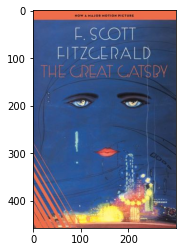

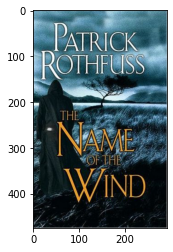

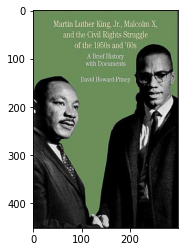

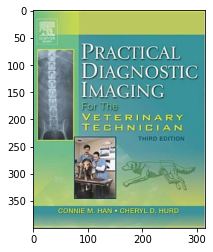

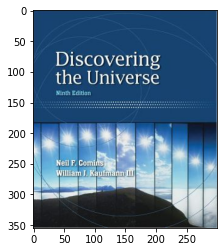

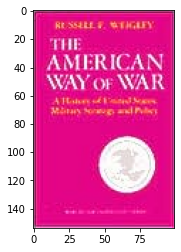

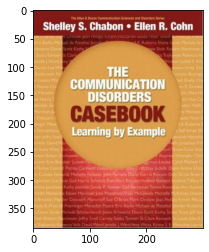

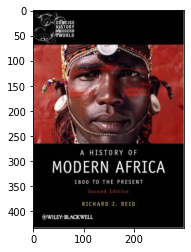

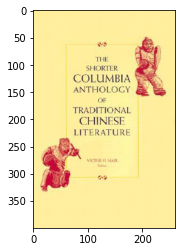

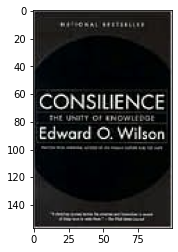

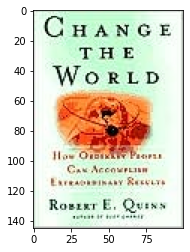

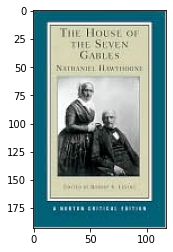

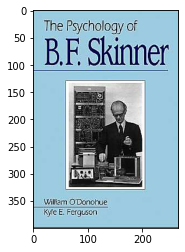

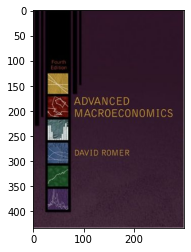

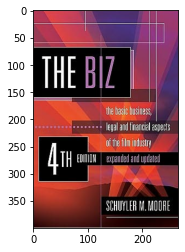

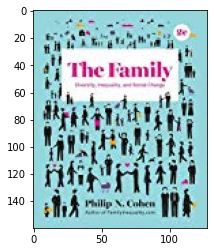

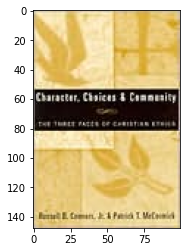

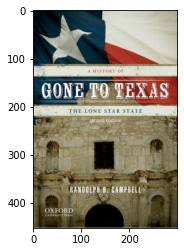

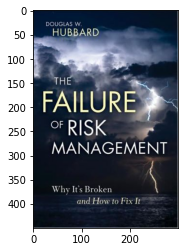

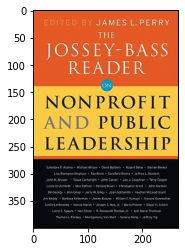

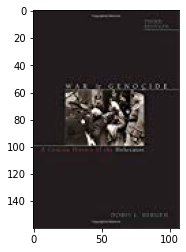

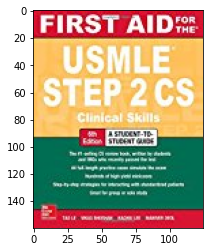

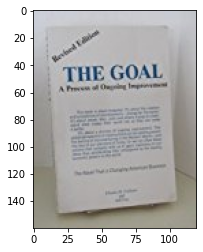

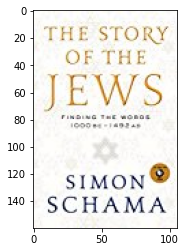

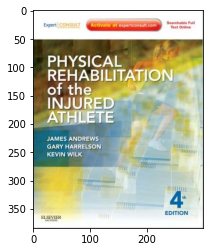

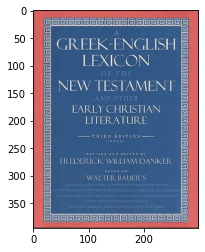

In [13]:
rec = recommend(df, "The Sixties: From Memory to History", "Philosophy" )

In [ ]:
rec.head()

In [ ]:
data